In [1]:
%matplotlib inline

In [16]:
# IMPORTS
from util.VisualizeDataset import VisualizeDataset
from Chapter4.TemporalAbstraction import NumericalAbstraction
from Chapter4.TemporalAbstraction import CategoricalAbstraction
from Chapter4.FrequencyAbstraction import FourierTransformation
from Chapter4.TextAbstraction import TextAbstraction

import copy
import pandas as pd
import matplotlib.pyplot as plt

import os
import sys
import warnings

In [4]:
# CONSTANTS
DATASETS_FOLDER_NAME = 'intermediate_datafiles'
DATASET_NAME = 'chapter3_result_final.csv'
DATASETS_FOLDER_PATH = os.path.join('.', DATASETS_FOLDER_NAME)
DATASET_PATH = os.path.join(DATASETS_FOLDER_PATH, DATASET_NAME)

In [21]:
# SETUP
warnings.filterwarnings('ignore')
visualizer = VisualizeDataset()

dataset = pd.read_csv(DATASET_PATH, index_col=0)
dataset.index = pd.to_datetime(dataset.index)
milliseconds_per_instance = (dataset.index[1] - dataset.index[0]).microseconds/1000

### Visualization of watch sensors

In [42]:
NumAbs = NumericalAbstraction()
dataset_copy = copy.deepcopy(dataset)
window_sizes = [int(float(5000)/milliseconds_per_instance), int(float(0.5*60000)/milliseconds_per_instance), int(float(5*60000)/milliseconds_per_instance)]
for ws in window_sizes:
    dataset_copy = NumAbs.abstract_numerical(dataset_copy, ['gyr_watch_x'], ws, 'mean')
    dataset_copy = NumAbs.abstract_numerical(dataset_copy, ['gyr_watch_x'], ws, 'std')
    dataset_copy = NumAbs.abstract_numerical(dataset_copy, ['acc_watch_x'], ws, 'mean')
    dataset_copy = NumAbs.abstract_numerical(dataset_copy, ['acc_watch_x'], ws, 'std')
    dataset_copy = NumAbs.abstract_numerical(dataset_copy, ['mag_watch_x'], ws, 'mean')
    dataset_copy = NumAbs.abstract_numerical(dataset_copy, ['mag_watch_x'], ws, 'std')

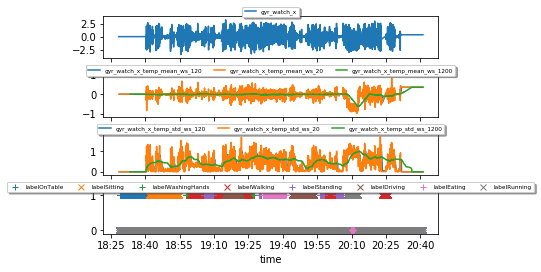

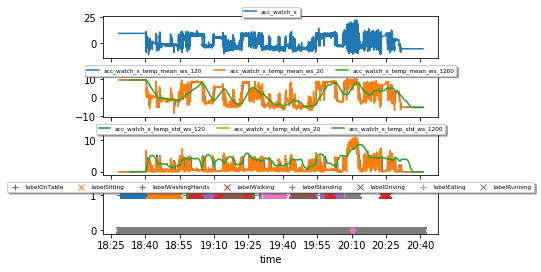

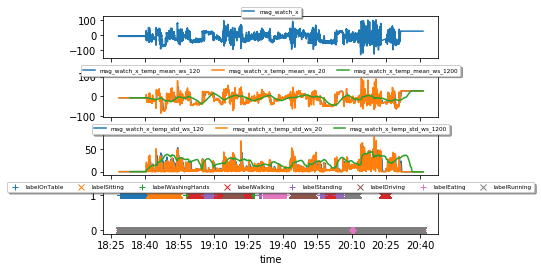

In [43]:
visualizer.plot_dataset(dataset_copy, 
                        ['gyr_watch_x', 'gyr_watch_x_temp_mean', 'gyr_watch_x_temp_std', 'label'], 
                        ['exact', 'like', 'like', 'like'], 
                        ['line', 'line', 'line', 'points'])

visualizer.plot_dataset(dataset_copy, 
                        ['acc_watch_x', 'acc_watch_x_temp_mean', 'acc_watch_x_temp_std', 'label'], 
                        ['exact', 'like', 'like', 'like'], 
                        ['line', 'line', 'line', 'points'])

visualizer.plot_dataset(dataset_copy, 
                        ['mag_watch_x', 'mag_watch_x_temp_mean', 'mag_watch_x_temp_std', 'label'], 
                        ['exact', 'like', 'like', 'like'], 
                        ['line', 'line', 'line', 'points'])

In [24]:
ws = int(float(0.5*60000)/milliseconds_per_instance)
selected_predictor_cols = [c for c in dataset.columns if not 'label' in c]
dataset = NumAbs.abstract_numerical(dataset, selected_predictor_cols, ws, 'mean')
dataset = NumAbs.abstract_numerical(dataset, selected_predictor_cols, ws, 'std')
CatAbs = CategoricalAbstraction()
dataset = CatAbs.abstract_categorical(dataset, ['label'], ['like'], 0.03, int(float(5*60000)/milliseconds_per_instance), 2)

labelOnTable
labelSitting
labelWalking
labelStanding
labelDriving
labelEating
labelRunning
Number of patterns of size 1 is 7
labelOnTable(b)labelOnTable
labelSitting(b)labelSitting
labelWalking(b)labelWalking
labelWalking(b)labelStanding
labelWalking(b)labelDriving
labelStanding(b)labelWalking
labelStanding(b)labelStanding
labelDriving(b)labelDriving
labelEating(b)labelEating
labelRunning(b)labelRunning
Number of patterns of size 2 is 10


In [49]:
# Now we move to the frequency domain, with the same window size.
FreqAbs = FourierTransformation()
fs = float(1000)/milliseconds_per_instance

periodic_predictor_cols = ['acc_phone_x','acc_phone_y','acc_phone_z','acc_watch_x','acc_watch_y','acc_watch_z','gyr_phone_x','gyr_phone_y',
                           'gyr_phone_z','gyr_watch_x','gyr_watch_y','gyr_watch_z','mag_phone_x','mag_phone_y','mag_phone_z',
                           'mag_watch_x','mag_watch_y','mag_watch_z']
# data_table = FreqAbs.abstract_frequency(copy.deepcopy(dataset), ['acc_watch_x'], int(float(10000)/milliseconds_per_instance), fs)
data_table = FreqAbs.abstract_frequency(copy.deepcopy(dataset), ['gyr_watch_x'], int(float(10000)/milliseconds_per_instance), fs)
data_table = FreqAbs.abstract_frequency(copy.deepcopy(dataset), ['mag_watch_x'], int(float(10000)/milliseconds_per_instance), fs)

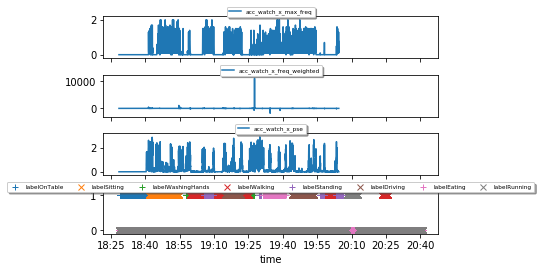

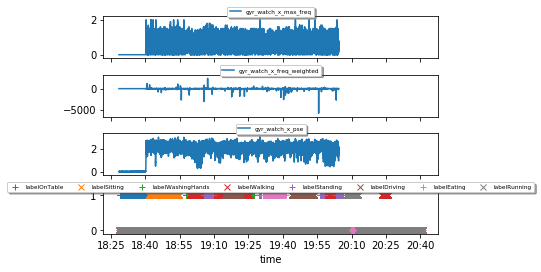

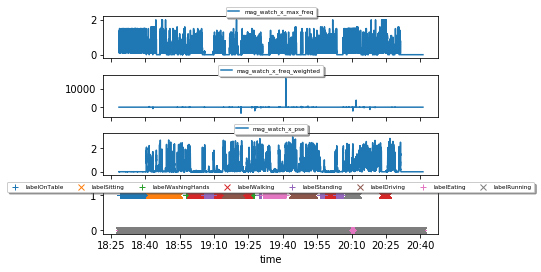

In [50]:
visualizer.plot_dataset(data_table, ['acc_watch_x_max_freq', 'acc_watch_x_freq_weighted', 'acc_watch_x_pse', 'label'], ['like', 'like', 'like', 'like'], ['line', 'line', 'line','points'])
visualizer.plot_dataset(data_table, ['gyr_watch_x_max_freq', 'gyr_watch_x_freq_weighted', 'gyr_watch_x_pse', 'label'], ['like', 'like', 'like', 'like'], ['line', 'line', 'line','points'])
visualizer.plot_dataset(data_table, ['mag_watch_x_max_freq', 'mag_watch_x_freq_weighted', 'mag_watch_x_pse', 'label'], ['like', 'like', 'like', 'like'], ['line', 'line', 'line','points'])
# dataset = FreqAbs.abstract_frequency(dataset, periodic_predictor_cols, int(float(10000)/milliseconds_per_instance), fs)